<a href="https://colab.research.google.com/github/Probingbug/foundations-for-ML/blob/main/Adam_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def quadratic_loss(x,y):
  return x**2+10*y**2

In [68]:
def quadratic_grad(x,y):
  dx=2*x
  dy=20*y

  return np.array ([dx,dy])

vanilla gradient descent

In [69]:
def grad_descent(grad_func,lr,epochs,start_point):
  x,y=start_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for _ in range (epochs):
    dx,dy=grad_func(x,y)
    x-=lr*dx
    y-=lr*dy
    path.append((x,y))
    losses.append(quadratic_loss(x,y))

  return np.array(path),np.array(losses)

Adam optimizar

In [70]:
def adam_optimizer(grad_function,lr,beta1,beta2,epsilon,epochs,start_point):
  x,y=start_point
  m=np.array([0.0,0.0])
  v=np.array([0.0,0.0])

  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for t in range (1,epochs+1):
    grad=grad_function(x,y)

    #update bias first moment estimate
    m=(beta1*m)+((1-beta1)*grad)
    #update bias second moment estimate
    v=(beta2*v)+((1-beta2)*(grad**2))

    #bias correction
    m_hat=m/(1-(beta1**t))
    v_hat=v/(1-(beta2**t))

    #update parameters
    x-=lr*(m_hat[0]/(np.sqrt(v_hat[0])+epsilon))
    y-=lr*(m_hat[1]/(np.sqrt(v_hat[1])+epsilon))

    path.append((x,y))
    losses.append(quadratic_loss(x,y))

  return np.array(path),np.array(losses)


visualization of path and losses

In [71]:
def path_plots(function,paths,labels,title):
  X,Y=np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  Z=function(X,Y)

  plt.figure(figsize=(8,6))
  plt.contour(X,Y,Z,levels=50,cmap='jet')

  for path,label in zip(paths,labels):
    plt.plot(path[:,0],path[:,1],label=label)

  plt.scatter(path[0,0],path[0,1],color="green",label= "start")
  plt.scatter(path[-1,0],path[-1,1],color="red",label= "end")

  plt.title(title)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

In [72]:
def plot_losses(losses,labels,title):
  plt.figure(figsize=(8,6))
  for loss,label in zip(losses,labels):
    plt.plot(loss,label=label)
  plt.title(title)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

parameters

In [73]:
lr_grad=0.1
lr_adam=0.1
beta1=0.9
beta2=0.999
epsilon=1e-8
epochs=400
start_point=np.array([1.5,1.5])

run optimizers

In [74]:
path_grad,losses_grad=grad_descent(quadratic_grad,lr_grad,epochs,start_point)
path_adam,losses_adam=adam_optimizer(quadratic_grad,lr_adam,beta1,beta2,epsilon,epochs,start_point)

plot results

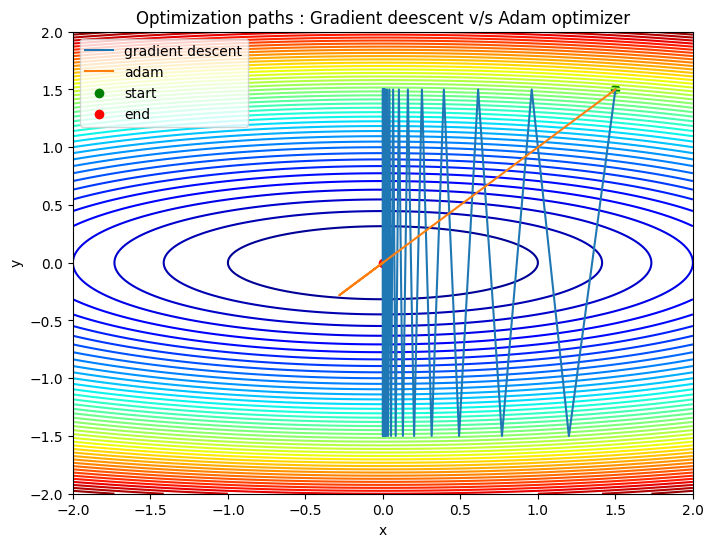

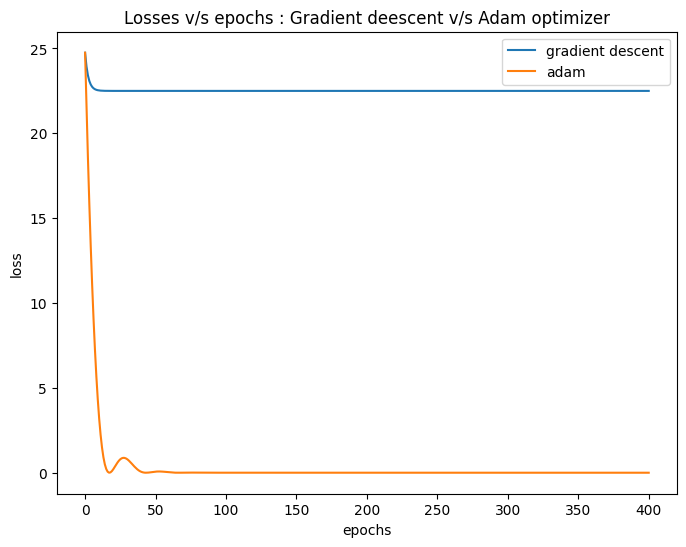

In [75]:
path_plots(quadratic_loss,[path_grad,path_adam],["gradient descent","adam"],'Optimization paths : Gradient deescent v/s Adam optimizer')
plot_losses([losses_grad,losses_adam],["gradient descent","adam"],'Losses v/s epochs : Gradient deescent v/s Adam optimizer')